In [240]:
import pandas as pd
import numpy as np

In [241]:
url = "https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%EC%A3%BC%ED%83%9D%EB%8F%84%EC%8B%9C%EB%B3%B4%EC%A6%9D%EA%B3%B5%EC%82%AC_%EC%A0%84%EA%B5%AD%20%EC%8B%A0%EA%B7%9C%20%EB%AF%BC%EA%B0%84%EC%95%84%ED%8C%8C%ED%8A%B8%20%EB%B6%84%EC%96%91%EA%B0%80%EA%B2%A9%20%EB%8F%99%ED%96%A5_20211130.csv"
df = pd.read_csv(url,encoding='cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [242]:
df.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"
6289,제주,전용면적 102제곱미터초과,2021,11,"6,815"


In [243]:
df['연도'].max(),df['연도'].min()

(2021, 2015)

In [244]:
# 2015년도 부터 데이터가 존재
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


In [245]:
# 결측치 확인
df.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    478
dtype: int64

In [246]:
# 데이터 타입변경 : 
type(df['분양가격(제곱미터)'][0])

str

In [247]:
int(df['분양가격(제곱미터)'][0])*3.3  # 단위는 천단위

19275.3

In [248]:
df['분양가격(제곱미터)'].fillna(0, inplace=True)

In [249]:
df['분양가격(제곱미터)']

0        5841
1        5652
2        5882
3        5721
4        5879
        ...  
6285    6,860
6286        0
6287    6,787
6288    5,924
6289    6,815
Name: 분양가격(제곱미터), Length: 6290, dtype: object

In [250]:
help(pd.to_numeric)

Help on function to_numeric in module pandas.core.tools.numeric:

to_numeric(arg, errors='raise', downcast=None)
    Convert argument to a numeric type.
    
    The default return dtype is `float64` or `int64`
    depending on the data supplied. Use the `downcast` parameter
    to obtain other dtypes.
    
    Please note that precision loss may occur if really large numbers
    are passed in. Due to the internal limitations of `ndarray`, if
    numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
    or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
    passed in, it is very likely they will be converted to float so that
    they can stored in an `ndarray`. These warnings apply similarly to
    `Series` since it internally leverages `ndarray`.
    
    Parameters
    ----------
    arg : scalar, list, tuple, 1-d array, or Series
        Argument to be converted.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then in

In [251]:
df['분양가격(제곱미터)'].replace(',','',regex=True,inplace=True)

In [252]:
df['분양가격(제곱미터)'] = pd.to_numeric(df['분양가격(제곱미터)'],errors='coerce')

In [253]:
df['분양가격(제곱미터)']

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
6285    6860.0
6286       0.0
6287    6787.0
6288    5924.0
6289    6815.0
Name: 분양가격(제곱미터), Length: 6290, dtype: float64

In [254]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  6259 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 245.8+ KB


In [255]:
df['평당가격'] = df['분양가격(제곱미터)']*3.3
df.columns = ['지역명', '규모구분', '연도', '월', '분양가격(제곱미터)',  '평당가격(천원)']

In [256]:
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [257]:
df.drop(['평당가격(천원)'],axis=1,inplace=True)

In [258]:
df['평당가격(천원)'] = df['분양가격(제곱미터)']*3.3
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [259]:
df['평당가격(천원)'].describe()

count     6259.000000
mean     10601.630931
std       5441.277018
min          0.000000
25%       8094.900000
50%       9834.000000
75%      12767.700000
max      45655.500000
Name: 평당가격(천원), dtype: float64

In [260]:
df['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [261]:
# 모든면적' 1 , '전용면적 60제곱미터이하'2, '전용면적 60제곱미터초과 85제곱미터이하'3,
#        '전용면적 85제곱미터초과 102제곱미터이하'4, '전용면적 102제곱미터초과'5

In [262]:
df['규모구분']=df['규모구분'].str.replace('모든면적','전체')
df['규모구분']=df['규모구분'].str.replace('전용면적 60제곱미터이하','~60')
df['규모구분']=df['규모구분'].str.replace('전용면적 60제곱미터초과 85제곱미터이하','60~85')
df['규모구분']=df['규모구분'].str.replace('전용면적 85제곱미터초과 102제곱미터이하','85~102')
df['규모구분']=df['규모구분'].str.replace('전용면적 102제곱미터초과','102~')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  6259 non-null   float64
 5   평당가격(천원)    6259 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 295.0+ KB


In [264]:
# group by를 이용한 데이터 분석
# 지역별 평당분양가격 2015 ~2021
df.groupby(['지역명'])['평당가격(천원)'].mean()

지역명
강원     8351.060270
경기    13803.320270
경남     9582.477568
경북     8505.848108
광주     9564.802500
대구    12759.441081
대전     7979.709945
부산    12586.699459
서울    25155.711685
세종     8837.025405
울산     7429.295380
인천    12855.676216
전남     8040.826630
전북     7960.688108
제주    10742.200000
충남     8161.488649
충북     7877.082162
Name: 평당가격(천원), dtype: float64

In [265]:
# 연도별 지역별 평당분양가격
df.groupby(['연도','지역명'])['평당가격(천원)'].mean()

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2021  전남      9585.815094
      전북      8841.360000
      제주     16213.090385
      충남      9433.320000
      충북      8805.540000
Name: 평당가격(천원), Length: 119, dtype: float64

In [266]:
# 전용면적별
df.groupby(['규모구분'])['평당가격(천원)'].mean()

규모구분
102~      11036.844695
60~85     10932.787202
85~102     9613.574820
~60       10441.951198
전체        10978.438951
Name: 평당가격(천원), dtype: float64

In [267]:
# 지역별, 전용면적별 평당가격 평균

In [268]:
df.groupby(['규모구분','지역명'])['평당가격(천원)'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
102~,9711.587838,15236.189189,9448.435135,9435.591892,10906.217143,14087.922973,6562.535294,13391.622973,24130.562500,9681.754054,6081.395833,14396.829730,9128.379730,8524.345946,10185.048649,8088.701351,8479.350000
60~85,8072.067568,13046.059459,9133.062162,8621.874324,10809.506757,12890.112162,10249.710811,12479.708108,24314.578378,9090.786486,10126.808108,12434.712162,7918.394595,7650.514865,13198.439189,8221.950000,7599.097297
85~102,7533.855405,14151.871622,11344.686486,7270.524324,5282.086765,11031.944595,3404.087500,12449.918919,27894.855405,9105.993243,2810.663514,12782.327027,7738.087500,8058.243243,5523.386301,8129.148649,8294.104054
~60,8328.263514,13504.045946,8815.236486,8559.709459,9626.456757,12907.950000,9144.121622,12080.274324,25034.558108,6767.318919,8028.721622,12303.559459,7495.236486,7886.643243,11484.582353,8165.314865,7465.714865
전체,8109.527027,13078.435135,9170.967568,8641.540541,10925.006757,12879.275676,10299.522973,12531.972973,24376.297297,9539.274324,10062.458108,12360.952703,7915.852703,7683.693243,13309.212162,8202.328378,7547.144595


In [269]:
df2 = df.groupby(['연도','지역명'])['평당가격(천원)'].mean()
df2.unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060,11060.940,8459.220,7464.160,7916.700000,9018.900,8190.600000,10377.400,20315.680000,8765.020,9367.600000,10976.020,6798.880000,7110.400,7951.075000,7689.880,6828.800
2016,6207.850,11684.970,8496.730,7753.405,8556.843103,10282.030,6796.322034,10743.535,21753.435000,8857.805,9263.155000,11099.055,6936.600000,6906.625,8918.837288,7958.225,7133.335
2017,7318.850,12296.185,8806.600,8011.795,8479.735000,10972.775,9417.265000,11637.615,21864.095000,8980.730,8149.790000,11672.430,7413.230000,7035.820,11155.210000,7885.405,7462.565
2018,8219.255,14258.420,9327.670,7523.340,7145.215000,11532.290,7675.580000,12889.965,23202.245000,9823.440,3755.180000,11089.430,7929.845000,8174.595,9946.640000,7518.335,8149.295
2019,8934.475,15665.540,10162.735,9050.250,8881.895000,14081.650,9043.760000,13537.865,28286.830000,9604.485,2043.250000,13249.775,7945.300000,8532.260,10251.340000,8019.770,7970.875
2020,9615.595,15106.080,9827.345,7998.155,12512.720000,15314.200,7117.935000,13353.010,29781.015000,3488.430,9414.240000,14982.990,8924.905000,8559.430,9225.370000,8377.765,8080.325
2021,10260.180,14557.140,11297.520,11181.540,12351.090566,15540.600,7727.694118,14030.880,27534.141509,12598.740,11998.675472,15751.620,9585.815094,8841.360,16213.090385,9433.320,8805.540


In [270]:
df2.unstack().transpose()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,6207.850000,7318.850,8219.255,8934.475,9615.595,10260.180000
경기,11060.940,11684.970000,12296.185,14258.420,15665.540,15106.080,14557.140000
경남,8459.220,8496.730000,8806.600,9327.670,10162.735,9827.345,11297.520000
경북,7464.160,7753.405000,8011.795,7523.340,9050.250,7998.155,11181.540000
광주,7916.700,8556.843103,8479.735,7145.215,8881.895,12512.720,12351.090566
대구,9018.900,10282.030000,10972.775,11532.290,14081.650,15314.200,15540.600000
대전,8190.600,6796.322034,9417.265,7675.580,9043.760,7117.935,7727.694118
부산,10377.400,10743.535000,11637.615,12889.965,13537.865,13353.010,14030.880000
서울,20315.680,21753.435000,21864.095,23202.245,28286.830,29781.015,27534.141509


In [271]:
# matplot 라이브러리에 한글 적용
import matplotlib.pyplot as plt

In [272]:
import platform
platform.system()

'Windows'

In [273]:
plt.rc('font', family='Malgun Gothic')

In [274]:
# 지역별 분양가격의 평균을 구한다음 시각화
df3 = df.groupby(['지역명'])['평당가격(천원)'].mean()
df3.values, df3.index

(array([ 8351.06027027, 13803.32027027,  9582.47756757,  8505.84810811,
         9564.8025    , 12759.44108108,  7979.70994475, 12586.69945946,
        25155.71168478,  8837.02540541,  7429.29538043, 12855.67621622,
         8040.82663043,  7960.68810811, 10742.2       ,  8161.48864865,
         7877.08216216]),
 Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
        '전남', '전북', '제주', '충남', '충북'],
       dtype='object', name='지역명'))

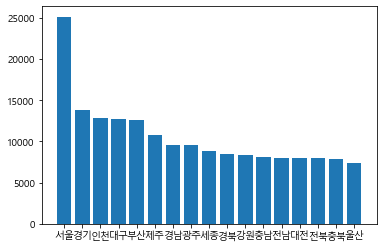

In [275]:
df3 = df3.sort_values(ascending=False)
plt.bar(df3.index,df3.values)
# plt.plot(df3.index, df3.values)
plt.show()

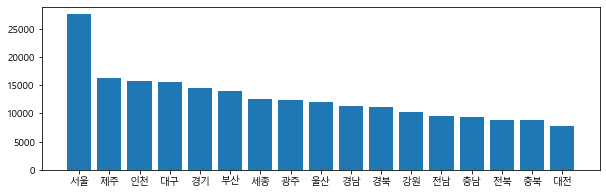

In [276]:
df4 = df[( df['연도'] == 2021)].groupby(['지역명'])['평당가격(천원)'].mean()
df4 = df4.sort_values(ascending=False)
plt.figure(figsize=(10,3))
plt.bar(df4.index,df4.values)
plt.show()

In [277]:
# 전용면적별 분양가격의 평균
df.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,전체,2015,10,5841.0,19275.3


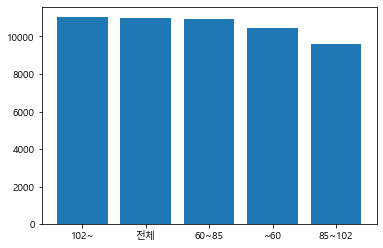

In [278]:
df5 = df.groupby(['규모구분'])['평당가격(천원)'].mean()
df5 = df5.sort_values(ascending=False)
plt.bar(df5.index, df5.values)
plt.show()

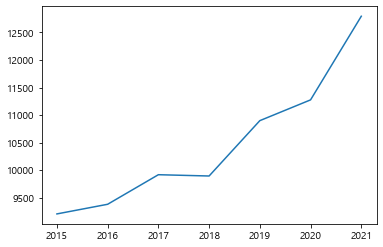

In [279]:
# 연도별 분양가 - 연속성을 가지는 데이터.. plot 점을 연결한 선... 
df6 = df.groupby(['연도'])['평당가격(천원)'].mean()
plt.plot(df6.index, df6.values)
plt.show()

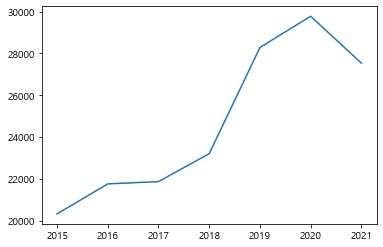

In [280]:
df[df['지역명'] == '서울']
df7 = df[df['지역명'] == '서울'].groupby(['연도'])['평당가격(천원)'].mean()
plt.plot(df7.index, df7.values)
plt.show()

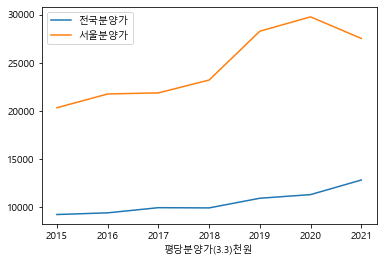

In [281]:
plt.plot(df6.index, df6.values)
plt.plot(df7.index, df7.values)
plt.xlabel('연도')
plt.xlabel('평당분양가(3.3)천원')
plt.legend(['전국분양가','서울분양가'])
plt.show()

In [282]:
df8 = df[df['지역명'] != '서울'].groupby(['연도'])['평당가격(천원)'].mean()

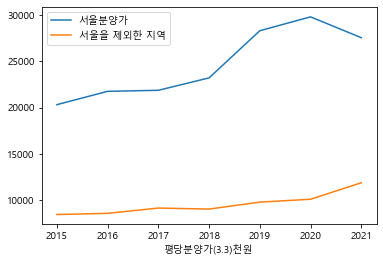

In [283]:
plt.plot(df7.index, df7.values)
plt.plot(df8.index, df8.values)
plt.xlabel('연도')
plt.xlabel('평당분양가(3.3)천원')
plt.legend(['서울분양가','서울을 제외한 지역'])
plt.show()

In [284]:
import seaborn as sns

In [285]:
df3 = pd.DataFrame(df3)
# df3.reset_index =  np.arange(17)
# df3
df3

,평당가격(천원)
지역명,
서울,25155.711685
경기,13803.320270
인천,12855.676216
대구,12759.441081
부산,12586.699459
제주,10742.200000
경남,9582.477568
광주,9564.802500
세종,8837.025405


In [286]:
# 전용면적별 평당 분양가격
df.columns = ['지역명','전용면적','연도','월','분양가격(제곱미터)','평당가격(천원)']
df.head()

,지역명,전용면적,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,전체,2015,10,5841.0,19275.3
1,서울,~60,2015,10,5652.0,18651.6
2,서울,60~85,2015,10,5882.0,19410.6
3,서울,85~102,2015,10,5721.0,18879.3
4,서울,102~,2015,10,5879.0,19400.7


In [287]:
pd.pivot_table(df, index='전용면적',values='평당가격(천원)')

,평당가격(천원)
전용면적,
102~,11036.844695
60~85,10932.787202
85~102,9613.574820
~60,10441.951198
전체,10978.438951


In [288]:
# 전용면적, 지역명.....별로 평당가격
pd.pivot_table(df,index='전용면적', columns='지역명',values='평당가격(천원)').round(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9711.59,15236.19,9448.44,9435.59,10906.22,14087.92,6562.54,13391.62,24130.56,9681.75,6081.40,14396.83,9128.38,8524.35,10185.05,8088.70,8479.35
60~85,8072.07,13046.06,9133.06,8621.87,10809.51,12890.11,10249.71,12479.71,24314.58,9090.79,10126.81,12434.71,7918.39,7650.51,13198.44,8221.95,7599.10
85~102,7533.86,14151.87,11344.69,7270.52,5282.09,11031.94,3404.09,12449.92,27894.86,9105.99,2810.66,12782.33,7738.09,8058.24,5523.39,8129.15,8294.10
~60,8328.26,13504.05,8815.24,8559.71,9626.46,12907.95,9144.12,12080.27,25034.56,6767.32,8028.72,12303.56,7495.24,7886.64,11484.58,8165.31,7465.71
전체,8109.53,13078.44,9170.97,8641.54,10925.01,12879.28,10299.52,12531.97,24376.30,9539.27,10062.46,12360.95,7915.85,7683.69,13309.21,8202.33,7547.14


In [289]:
year_region_mean =  pd.pivot_table(df,index=['연도','지역명'], values='평당가격(천원)').round(2)
year_region_mean.loc[2021]


,평당가격(천원)
지역명,
강원,10260.18
경기,14557.14
경남,11297.52
경북,11181.54
광주,12351.09
대구,15540.60
대전,7727.69
부산,14030.88
서울,27534.14


In [290]:
# box plot  
# 사분위수 - 중앙값(제2사분위수: Q2) 
# 데이터의 퍼짐정도를 나타낼때 표준편차보다 IRQ를 사용 Q3-Q1

In [291]:
#Seaborn으로 시각화
import seaborn as sns

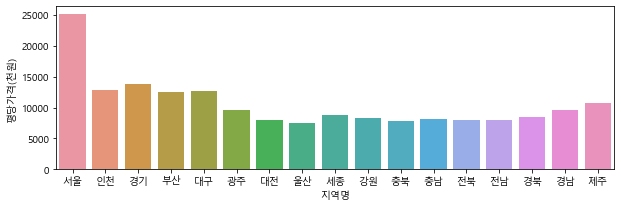

In [292]:
# 지역별 평당 분양가격
plt.figure(figsize=(10,3))
sns.barplot(data=df, x='지역명', y='평당가격(천원)',ci=None)
plt.show()

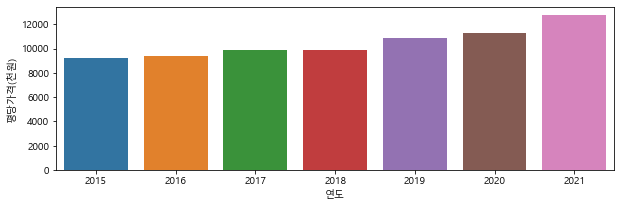

In [293]:
#연도별 평단 분양가
plt.figure(figsize=(10,3))
sns.barplot(data=df,x='연도', y='평당가격(천원)',ci=None)
plt.show()

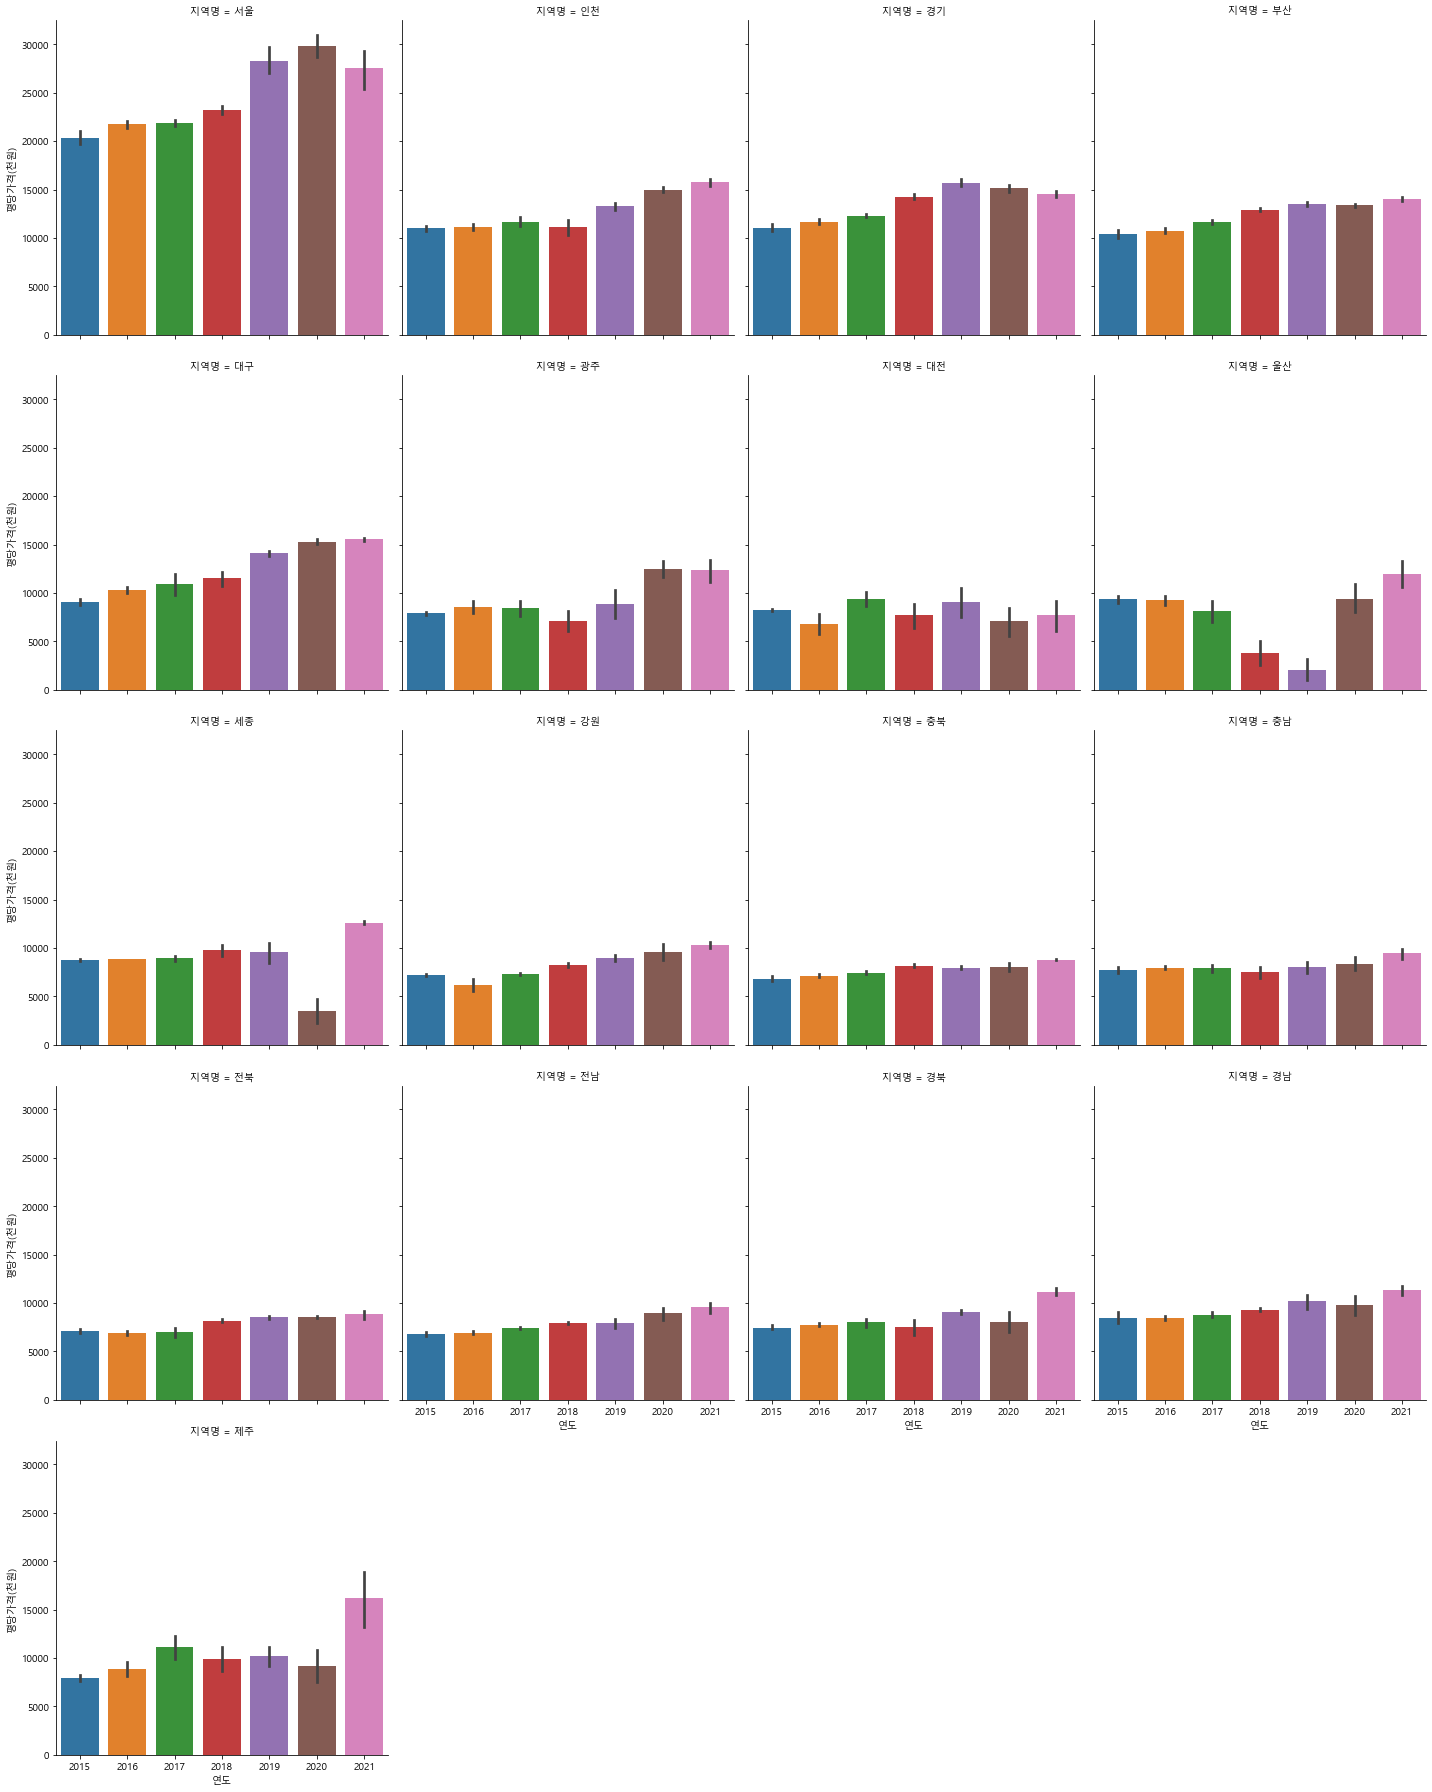

In [294]:
sns.catplot(data=df,x='연도',y='평당가격(천원)',col='지역명',col_wrap=4,kind='bar')
plt.show()

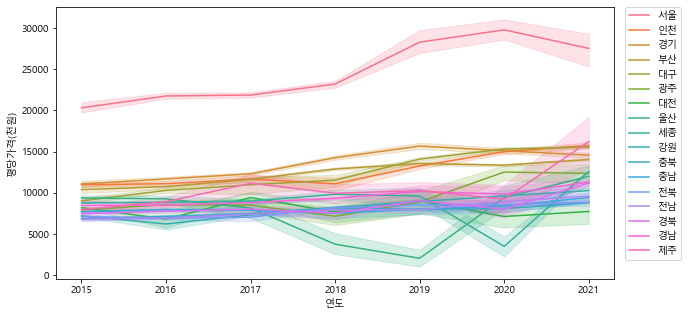

In [295]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='연도',y='평당가격(천원)', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad =0.)
plt.show()

<AxesSubplot:xlabel='연도', ylabel='평당가격(천원)'>

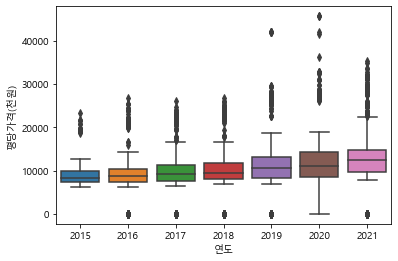

In [296]:
# boxplot
# 연도별 평균 분양가격
sns.boxplot(data=df,x='연도',y='평당가격(천원)')

<AxesSubplot:xlabel='연도', ylabel='평당가격(천원)'>

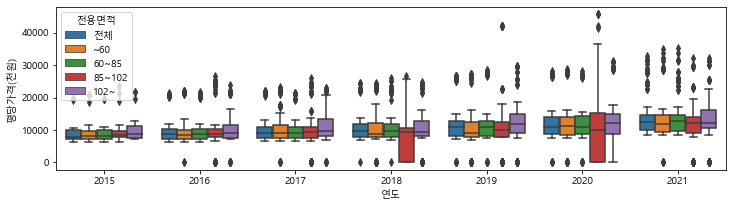

In [297]:
# hue 옵션을 줘서 전용면적별로 다르게 표현
plt.figure(figsize=(12,3))
sns.boxplot(data=df,x='연도',y='평당가격(천원)', hue='전용면적')


<AxesSubplot:xlabel='연도', ylabel='평당가격(천원)'>

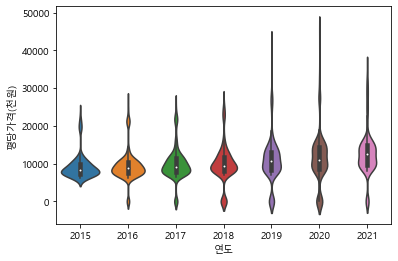

In [298]:
# 연도별 평당 분양가격을 violinplot
sns.violinplot(data=df,x='연도', y='평당가격(천원)')

<AxesSubplot:xlabel='연도', ylabel='평당가격(천원)'>

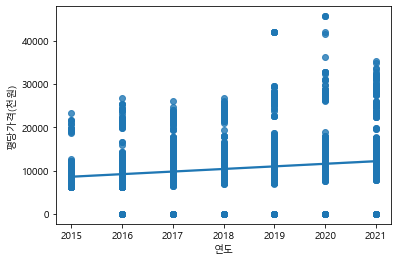

In [299]:
#연도별 평균 분양가격
sns.regplot(data=df, x='연도', y='평당가격(천원)')

<AxesSubplot:xlabel='연도', ylabel='평당가격(천원)'>

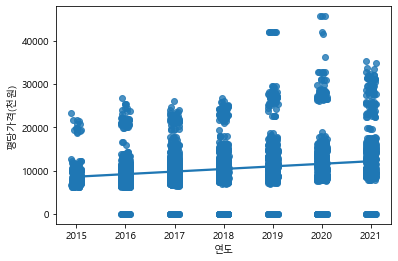

In [300]:
sns.regplot(data=df, x='연도', y='평당가격(천원)', x_jitter=.1)

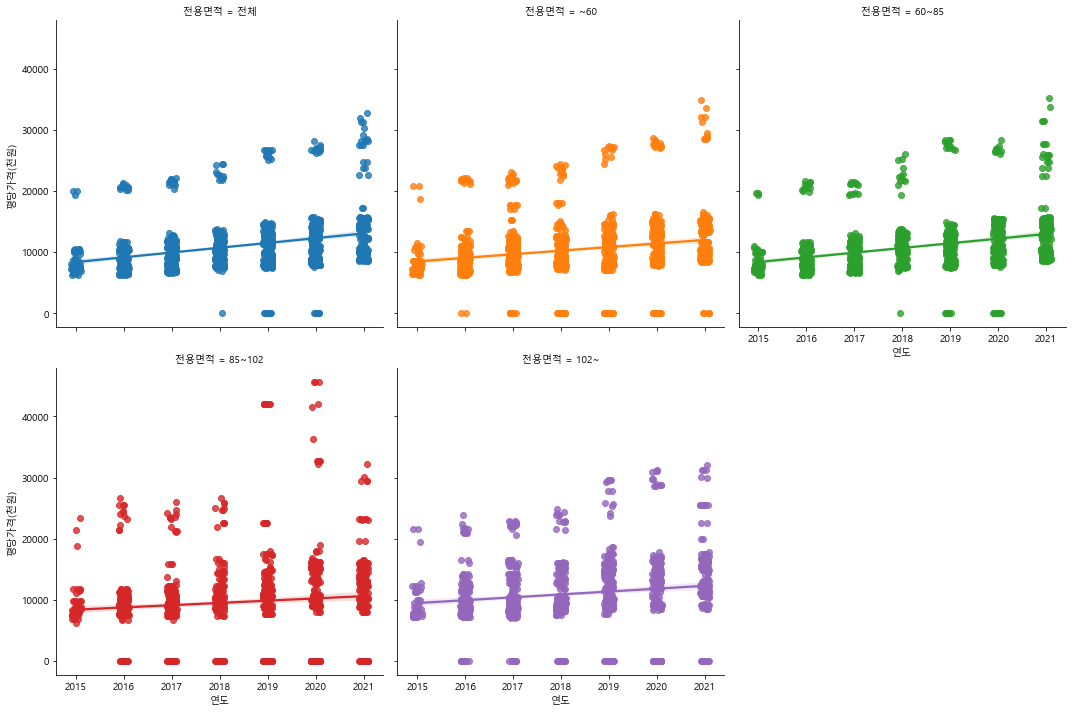

In [301]:
sns.lmplot(data=df, x='연도', y='평당가격(천원)', hue='전용면적', col='전용면적', col_wrap=3,x_jitter=.1)

In [302]:
# 이상치  out lier

In [303]:
df['평당가격(천원)'].describe()

count     6259.000000
mean     10601.630931
std       5441.277018
min          0.000000
25%       8094.900000
50%       9834.000000
75%      12767.700000
max      45655.500000
Name: 평당가격(천원), dtype: float64

In [304]:
max_price = df['평당가격(천원)'].max()

In [305]:
df[df['평당가격(천원)'] == max_price]

,지역명,전용면적,연도,월,분양가격(제곱미터),평당가격(천원)
4423,서울,85~102,2020,2,13835.0,45655.5
4508,서울,85~102,2020,3,13835.0,45655.5
4593,서울,85~102,2020,4,13835.0,45655.5


In [306]:
df[df['평당가격(천원)'] == 0]

,지역명,전용면적,연도,월,분양가격(제곱미터),평당가격(천원)
368,광주,85~102,2016,2,0.0,0.0
369,광주,102~,2016,2,0.0,0.0
374,대전,102~,2016,2,0.0,0.0
388,강원,85~102,2016,2,0.0,0.0
421,제주,~60,2016,2,0.0,0.0
...,...,...,...,...,...,...
6238,대전,85~102,2021,11,0.0,0.0
6239,대전,102~,2021,11,0.0,0.0
6244,울산,102~,2021,11,0.0,0.0
6273,전남,85~102,2021,11,0.0,0.0


In [307]:
# 지역별 평균을구해서 0인 곳에 대입한다.
region_mean =  df[df['평당가격(천원)'] != 0].groupby(['지역명'])['평당가격(천원)'].mean()
region_mean['강원']
# df.groupby(['지역명'])['평당가격(천원)'].mean()

8630.98407821229

In [353]:
df2 = df.copy()
# df.loc[:,'지역명'] = '강원'

In [354]:
def changeData(region:str):    
    datas= np.where(df2[df2['지역명']==region]['평당가격(천원)'] ==0
             ,region_mean[region], df2[df2['지역명']==region]['평당가격(천원)'])
    df2.loc[df2['지역명'] == region,'평당가격(천원)'] = datas

In [355]:
for i in df2['지역명'].unique():
    changeData(i)

In [356]:
df2.groupby(['지역명'])['평당가격(천원)'].min()

지역명
강원     6639.6
경기    10160.7
경남     7260.0
경북     6949.8
광주     7428.3
대구     8259.9
대전     8002.5
부산     9669.0
서울    16701.3
세종     8487.6
울산     7992.6
인천     9537.0
전남     6289.8
전북     6270.0
제주     7342.5
충남     6926.7
충북     6164.4
Name: 평당가격(천원), dtype: float64

<AxesSubplot:>

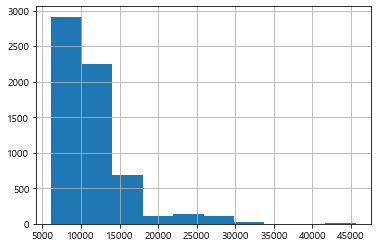

In [357]:
df2['평당가격(천원)'].hist(bins=10)

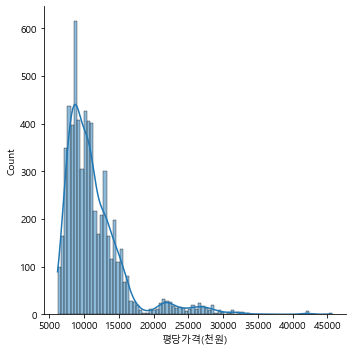

In [368]:
sns.displot(df2['평당가격(천원)'],kde=True)

<AxesSubplot:xlabel='평당가격(천원)', ylabel='Density'>

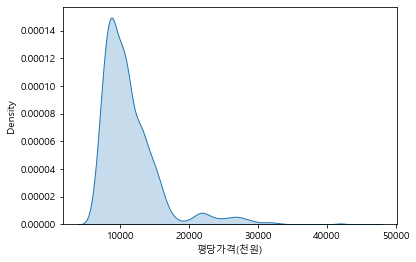

In [366]:
sns.kdeplot(df2['평당가격(천원)'],shade=True)

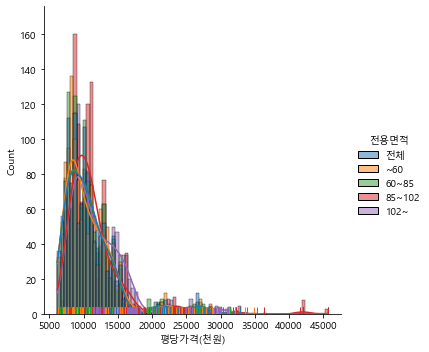

In [373]:
sns.displot(df2,x='평당가격(천원)',hue='전용면적',rug=True, kde=True)
plt.show()

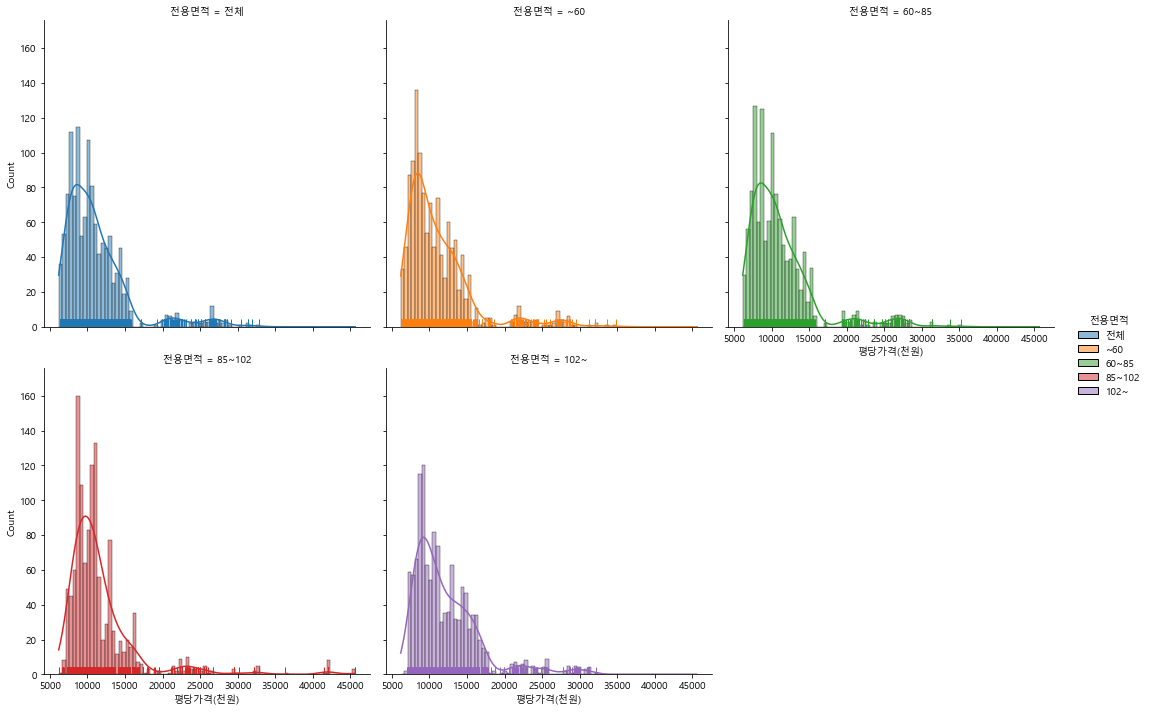

In [374]:
sns.displot(df2,x='평당가격(천원)',hue='전용면적',col='전용면적',rug=True, kde=True, col_wrap=3)
plt.show()

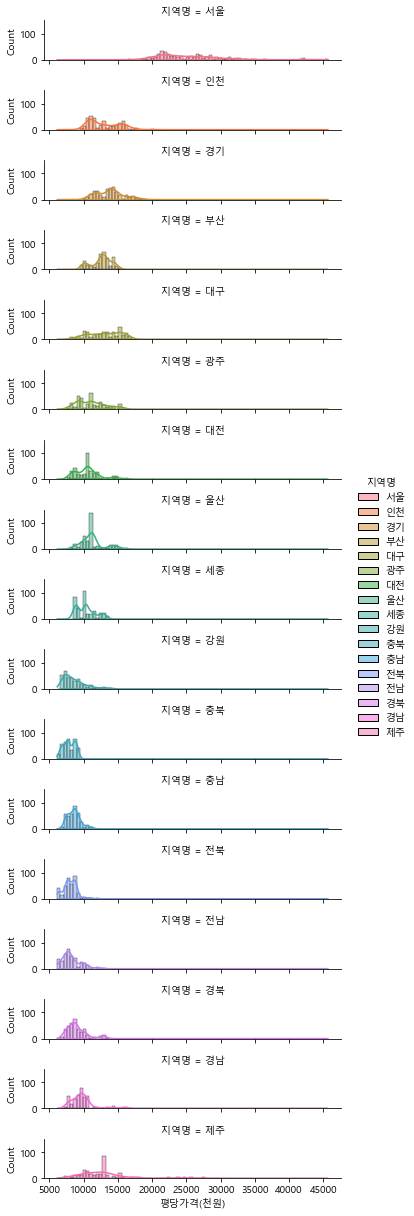

In [376]:
sns.displot(df2,x='평당가격(천원)',hue='지역명',col='지역명',rug=True, kde=True
            , col_wrap=1, aspect=5,height=1)
plt.show()